##**<h1>UNIVERSIDAD ICESI**</h1>

#<b>Maestria en Inteligencia Artificial Aplicada</b>
##Curso :  Analisis de Datos
##TALLER Nro. 2 - ANALISIS UNIVARIADO

##Presentado por :
## William Alonso Cañas Ayala

## **DataSet :** Coffee Shop Daily Revenue Prediction Dataset


El  conjunto de datos contiene 2.000 filas de datos de cafeterías, que ofrecen información detallada sobre los factores que influyen en los ingresos diarios,incluye variables operativas y ambientales claves que proporcionan una visión integral de cómo las actividades comerciales y las condiciones externas afectan el rendimiento de las ventas, aplicable para predecir los ingresos diarios de la cafetería utilizando el recuento de clientas, el gasto en marketing y mucho más

*https://www.kaggle.com/datasets/himelsarder/coffee-shop-daily-revenue-prediction-dataset*

**Preparando entorno de trabajo**

In [77]:
# bibliotecas para manipulación de datos
import pandas as pd
import numpy as np

# bibliotecas para visualización de los datos
import matplotlib.pyplot as plt
import seaborn as sns

# bibliotecas para preprocesamiento de los datos
from sklearn.model_selection import train_test_split

from scipy import stats
from scipy.stats import skew, kurtosis

In [42]:
def tabla_descriptivas(columnas):
    tabla_descriptivas=pd.DataFrame(columnas.describe())
    tabla_descriptivas.loc['coef. variation']=columnas.std()/columnas.mean()
    tabla_descriptivas.loc['skew']=skew(columnas)
    tabla_descriptivas.loc['kurtosis']=kurtosis(columnas)
    return tabla_descriptivas

**Carga de datos**

In [43]:
# Carga de datos
data = pd.read_csv("coffee_shop_revenue.csv")

**Analisis Descriptivo Basico**

In [44]:
# Información básica sobre el conjunto de datos
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_Customers_Per_Day  2000 non-null   int64  
 1   Average_Order_Value          2000 non-null   float64
 2   Operating_Hours_Per_Day      2000 non-null   int64  
 3   Number_of_Employees          2000 non-null   int64  
 4   Marketing_Spend_Per_Day      2000 non-null   float64
 5   Location_Foot_Traffic        2000 non-null   int64  
 6   Daily_Revenue                2000 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 109.5 KB
None


In [45]:
# Numero de registros
data.shape

(2000, 7)

El conjunto de datos esta compuesto por 2.000 registros   y siete (7) varaiables continuas.

<d1>
<dt><b>Number of Customers Per Day</b></dt>
<dd>El número total de clientes que visitan la cafetería en un día determinado.</dd>
<dt><b>Average Order Value</b></dt>
<dd>El monto promedio en dólares gastado por cada cliente durante su visita.</dd>
<dt><b>Operating Hours Per Day</b></dt>
<dd>Número total de horas que la cafetería está abierta al público cada día.</dd>
<dt><b>Number of Employees</b></dt>
<dd>El número de empleados que trabajan en un día determinado. Esto puede influir en la velocidad del servicio, la satisfacción del cliente y, en última instancia, en las ventas.</dd>
<dt><b>Marketing Spend Per Day</b></dt>
<dd>La cantidad de dinero gastado en campañas de marketing o promociones en un día determinado.</dd>
<dt><b>Location Foot Traffic</b></dt>
<dd>El número de personas que pasan por la cafetería por hora, una variable indicativa de la ubicación de la tienda y su potencial para atraer clientes.</dd>
<dt><b>Daily_Revenue</b></dt>
<dd>Ingresos diarios</dd>
</d1>

In [47]:
#Identifica existencia de valores nulos
data.isna().sum()

,0
Number_of_Customers_Per_Day,0
Average_Order_Value,0
Operating_Hours_Per_Day,0
Number_of_Employees,0
Marketing_Spend_Per_Day,0
Location_Foot_Traffic,0
Daily_Revenue,0


In [51]:
# Estadisticas descriptivas de las variables continuas
tabla_descriptivas(data)

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,274.296000,6.261215,11.667000,7.947000,252.614160,534.893500,1917.325940
std,129.441933,2.175832,3.438608,3.742218,141.136004,271.662295,976.202746
min,50.000000,2.500000,6.000000,2.000000,10.120000,50.000000,-58.950000
25%,164.000000,4.410000,9.000000,5.000000,130.125000,302.000000,1140.085000
50%,275.000000,6.300000,12.000000,8.000000,250.995000,540.000000,1770.775000
75%,386.000000,8.120000,15.000000,11.000000,375.352500,767.000000,2530.455000
max,499.000000,10.000000,17.000000,14.000000,499.740000,999.000000,5114.600000
coef. variation,0.471906,0.347510,0.294729,0.470897,0.558702,0.507881,0.509148
skew,-0.000728,-0.034354,-0.050084,0.020981,0.036772,-0.050380,0.634541


**Analisis de variables numericas**

 Analisis Univariante de Number_of_Customers_Per_Day:
count    2000.000000
mean      274.296000
std       129.441933
min        50.000000
25%       164.000000
50%       275.000000
75%       386.000000
max       499.000000
Name: Number_of_Customers_Per_Day, dtype: float64


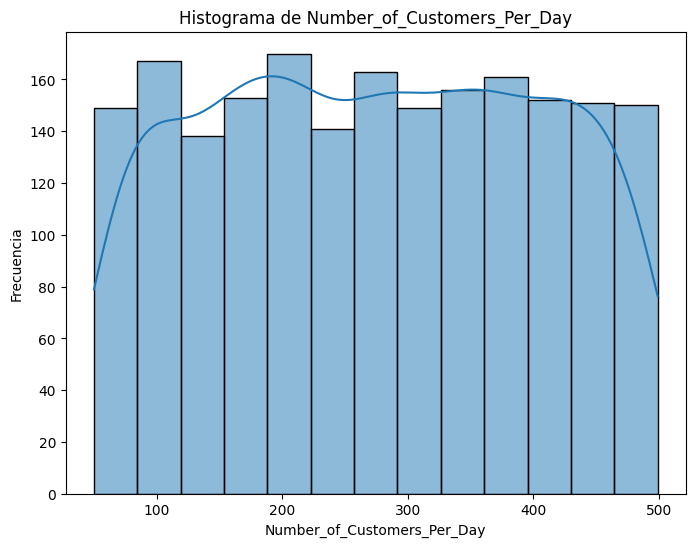

 Analisis Univariante de Average_Order_Value:
count    2000.000000
mean        6.261215
std         2.175832
min         2.500000
25%         4.410000
50%         6.300000
75%         8.120000
max        10.000000
Name: Average_Order_Value, dtype: float64


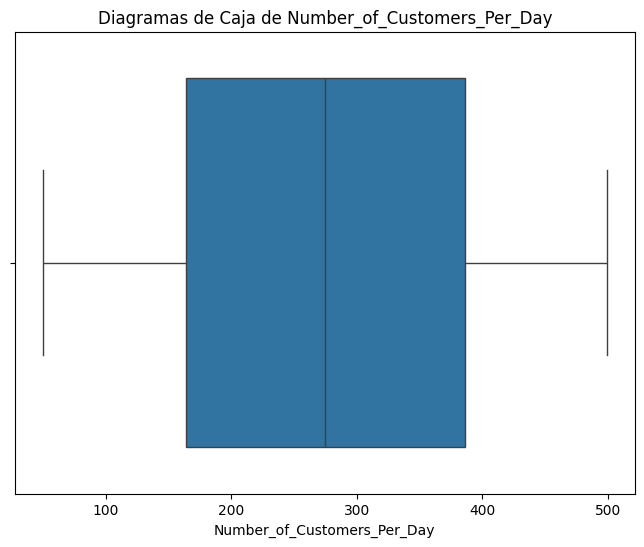

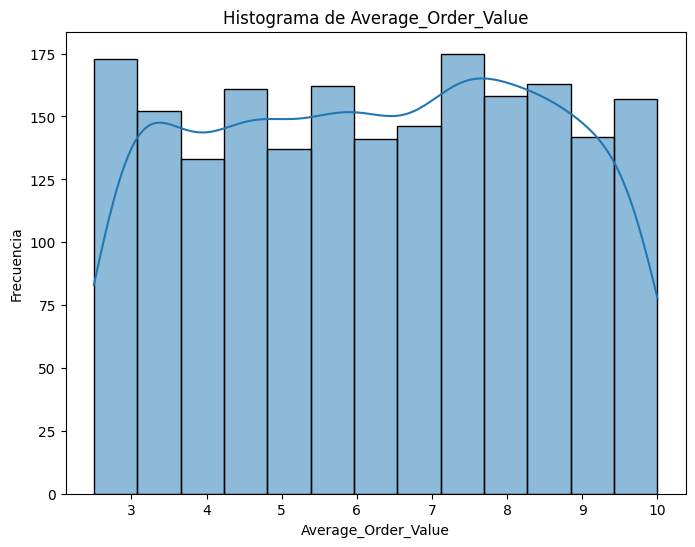

 Analisis Univariante de Operating_Hours_Per_Day:
count    2000.000000
mean       11.667000
std         3.438608
min         6.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: Operating_Hours_Per_Day, dtype: float64


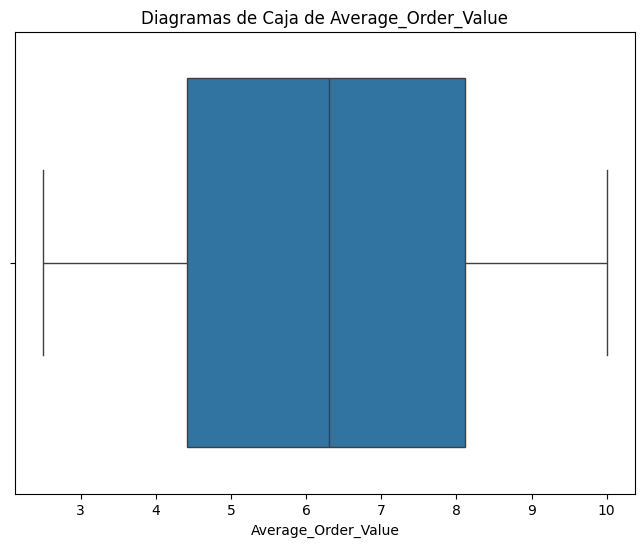

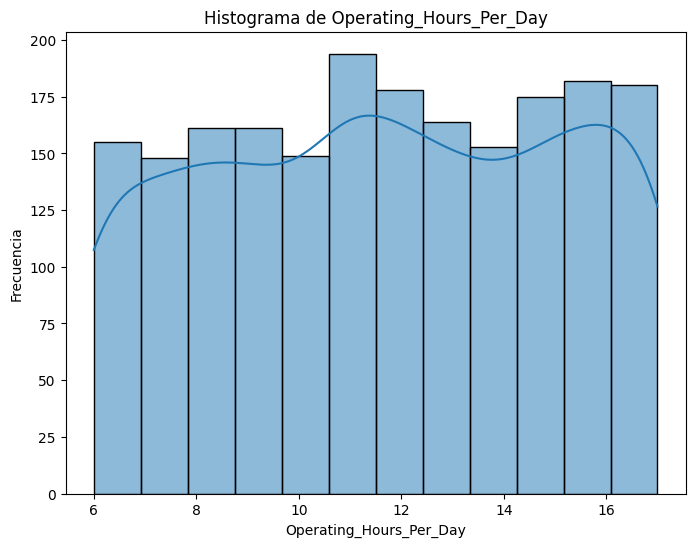

 Analisis Univariante de Number_of_Employees:
count    2000.000000
mean        7.947000
std         3.742218
min         2.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        14.000000
Name: Number_of_Employees, dtype: float64


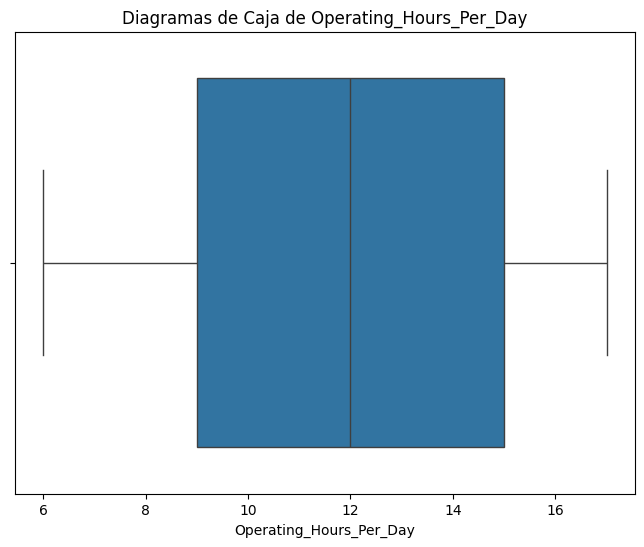

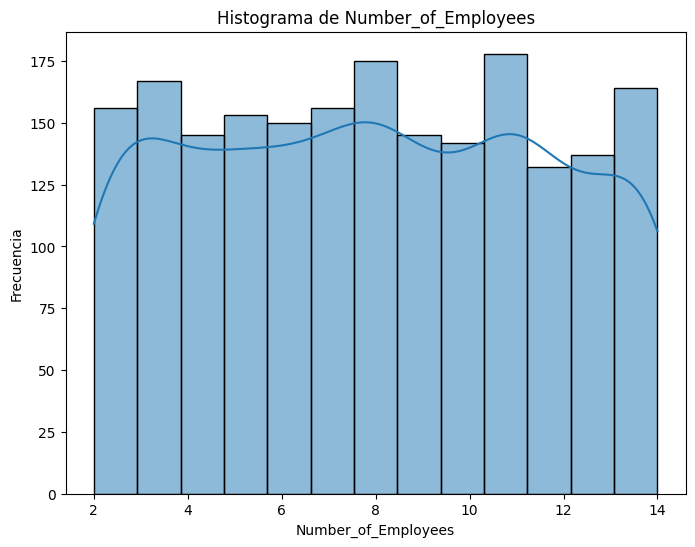

 Analisis Univariante de Marketing_Spend_Per_Day:
count    2000.000000
mean      252.614160
std       141.136004
min        10.120000
25%       130.125000
50%       250.995000
75%       375.352500
max       499.740000
Name: Marketing_Spend_Per_Day, dtype: float64


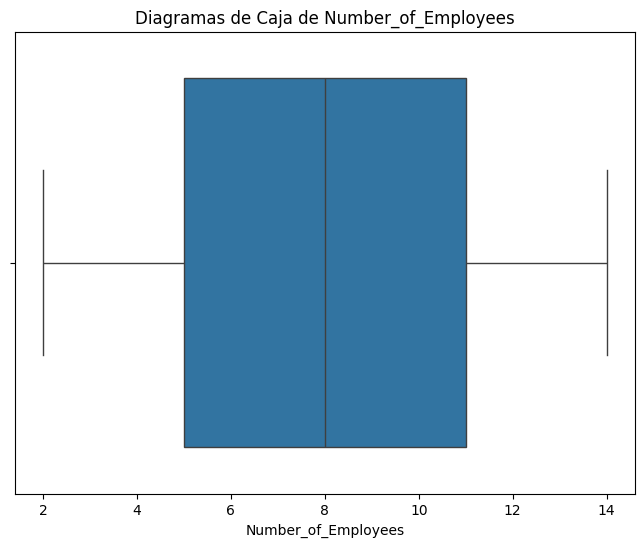

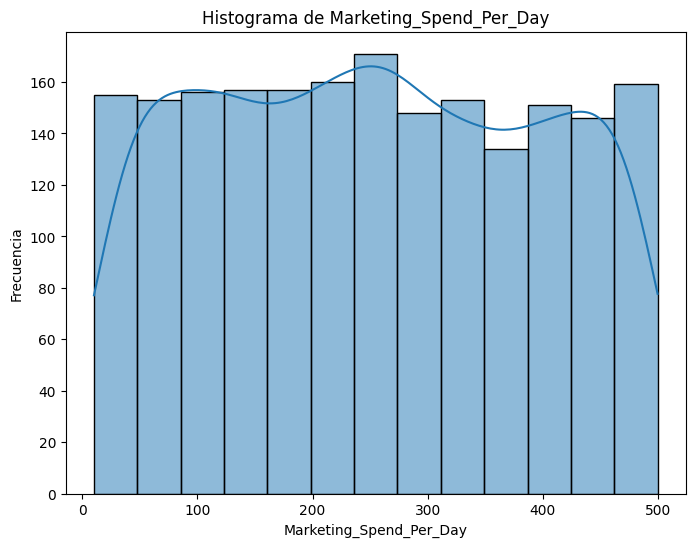

 Analisis Univariante de Location_Foot_Traffic:
count    2000.000000
mean      534.893500
std       271.662295
min        50.000000
25%       302.000000
50%       540.000000
75%       767.000000
max       999.000000
Name: Location_Foot_Traffic, dtype: float64


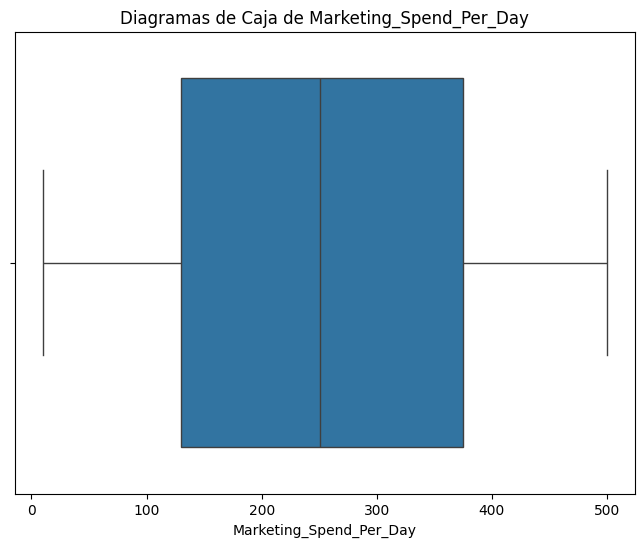

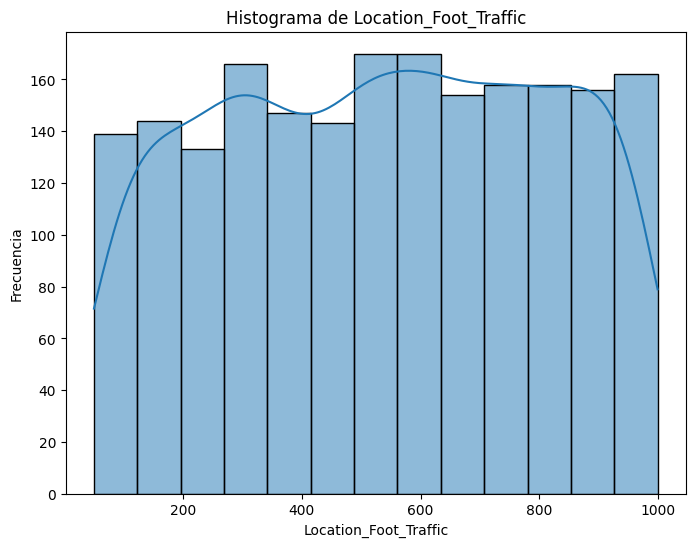

 Analisis Univariante de Daily_Revenue:
count    2000.000000
mean     1917.325940
std       976.202746
min       -58.950000
25%      1140.085000
50%      1770.775000
75%      2530.455000
max      5114.600000
Name: Daily_Revenue, dtype: float64


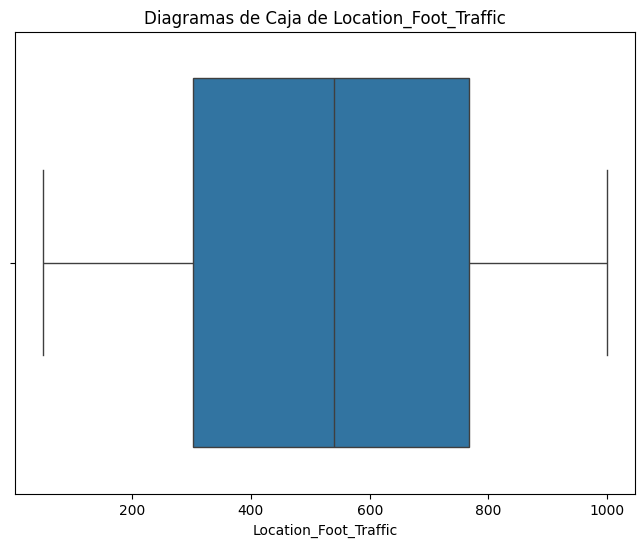

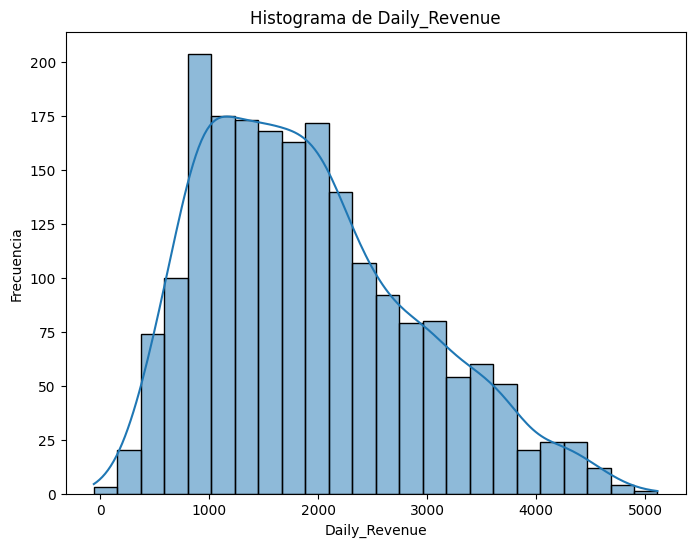

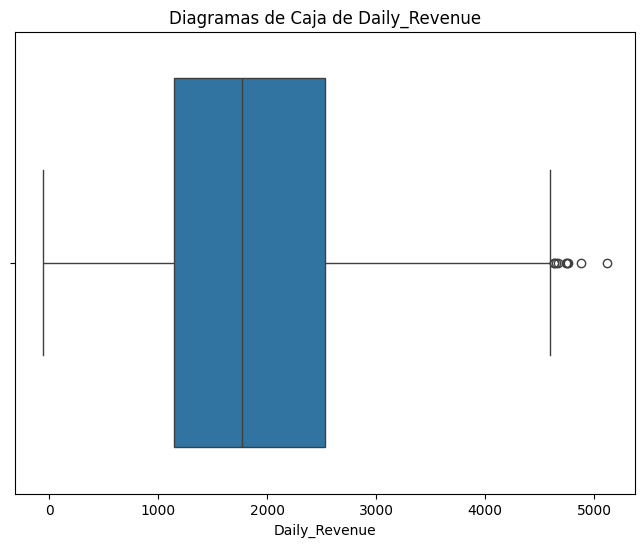

In [81]:
columnas = data.select_dtypes(include=np.number).columns
for columna in columnas:
  # Estadisticas Descriptiva
   print(f" Analisis Univariante de {columna}:")
   print(data[columna].describe())

  # Histogramas
   plt.figure(figsize=(8, 6))
   sns.histplot(data[columna], kde=True)
   plt.title(f'Histograma de {columna}')
   plt.xlabel(columna)
   plt.ylabel('Frecuencia')
   plt.show()
 # Diagramas de Caja
   plt.figure(figsize=(8, 6))
   sns.boxplot(x=data[columna])
   plt.title(f'Diagramas de Caja de {columna}')
   plt.xlabel(columna)



array([[<Axes: xlabel='Number_of_Customers_Per_Day', ylabel='Number_of_Customers_Per_Day'>,
        <Axes: xlabel='Average_Order_Value', ylabel='Number_of_Customers_Per_Day'>,
        <Axes: xlabel='Operating_Hours_Per_Day', ylabel='Number_of_Customers_Per_Day'>,
        <Axes: xlabel='Number_of_Employees', ylabel='Number_of_Customers_Per_Day'>,
        <Axes: xlabel='Marketing_Spend_Per_Day', ylabel='Number_of_Customers_Per_Day'>,
        <Axes: xlabel='Location_Foot_Traffic', ylabel='Number_of_Customers_Per_Day'>,
        <Axes: xlabel='Daily_Revenue', ylabel='Number_of_Customers_Per_Day'>],
       [<Axes: xlabel='Number_of_Customers_Per_Day', ylabel='Average_Order_Value'>,
        <Axes: xlabel='Average_Order_Value', ylabel='Average_Order_Value'>,
        <Axes: xlabel='Operating_Hours_Per_Day', ylabel='Average_Order_Value'>,
        <Axes: xlabel='Number_of_Employees', ylabel='Average_Order_Value'>,
        <Axes: xlabel='Marketing_Spend_Per_Day', ylabel='Average_Order_Value'>,
   

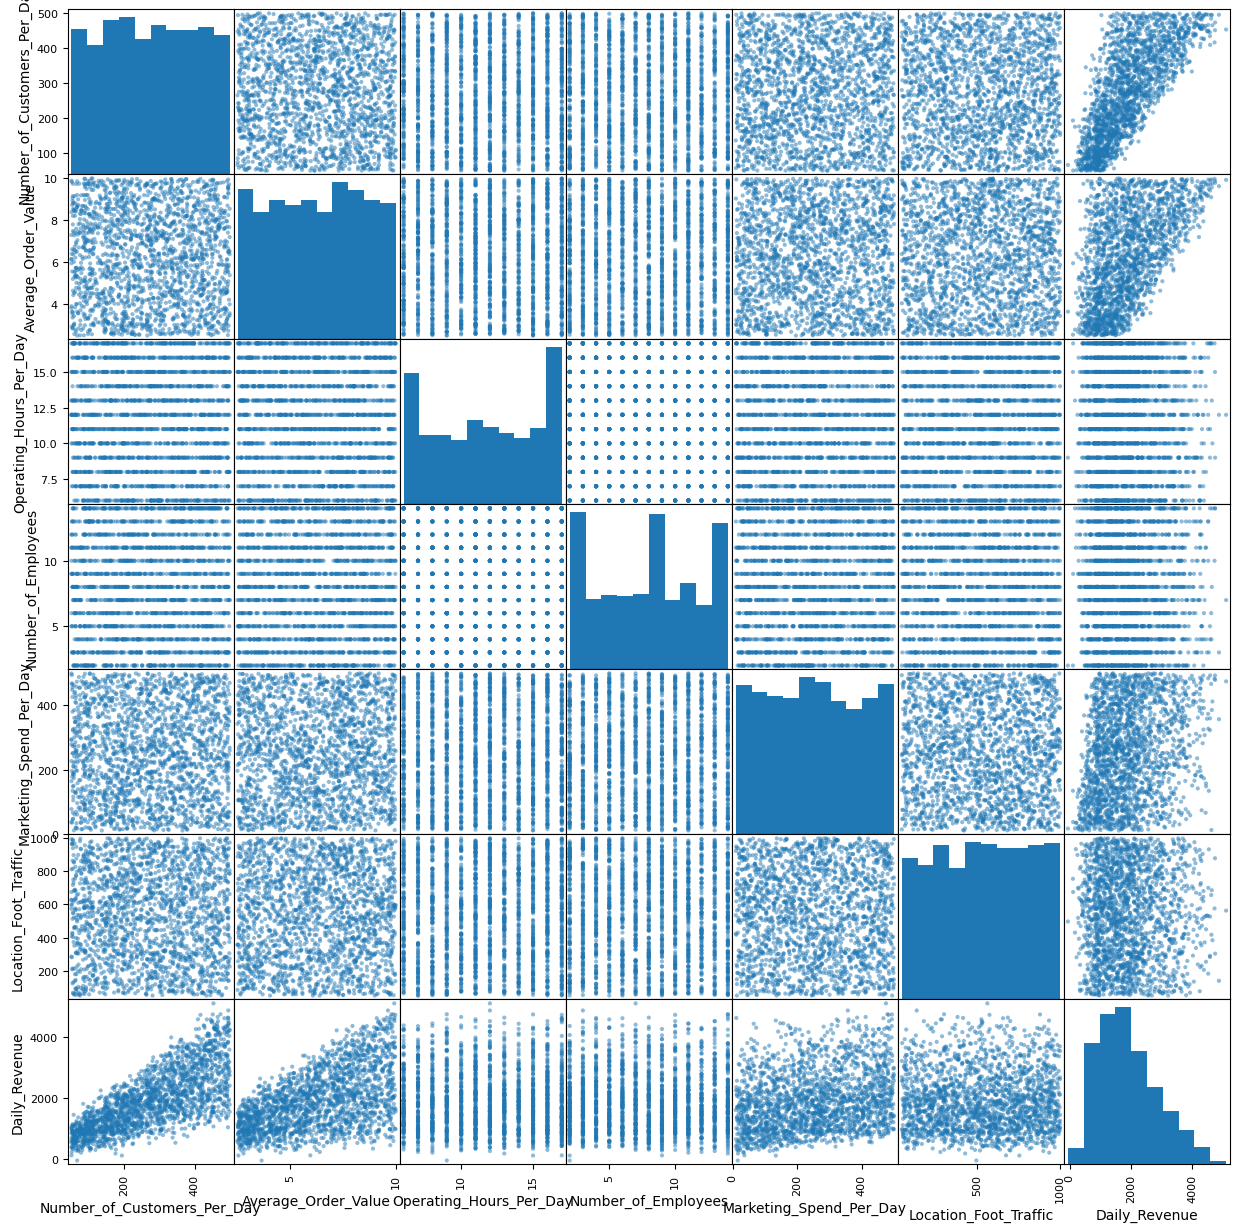

In [59]:
# Matriz de Graficos de Dispersion
pd.plotting.scatter_matrix(data, figsize=(15,15))

La matriz de  graficos de dispersion nos permite identificar que existe una relacion entre las variable **Number_of_Customers_Per_Day** y **Daily_Revenue** lo que nos permite inferir que los ingresos diarios varian en funcion del numero de clientes por dia

* Number_of_Customers_Per_Day

In [62]:
X=data['Number_of_Customers_Per_Day'].values
Y=data['Daily_Revenue'].values